# Real-time Motion Estimation with SNNs on Neuromorphic Hardware 🚀🧠

This tutorial will introduce you to real-time motion estimation using Spiking Neural Networks (SNNs) on neuromorphic hardware. We'll focus on a specific encoding scheme known as time difference encoding, which allows us to efficiently represent temporal information in spiking neural networks. By leveraging neuromorphic hardware, we can achieve real-time performance and low power consumption for motion estimation tasks.

By the end of this tutorial, you will have a good understanding of real-time motion estimation using SNNs on neuromorphic hardware and how to exploit time difference encoding for efficient temporal representation using event-based data.

The tutorial is based on the use of event-driven visual data exploiting time-difference encoding to encode the direction of moving objects in the scene. The publication **"Event-Based Eccentric Motion Detection Exploiting Time Difference Encoding"** proposes a novel approach to motion detection using an eccentric down-sampling of the visual field and the Spiking Elementary Motion Detector (sEMD) model. The system was characterized by simulated and real-world data collected with bio-inspired event-driven cameras, and successfully implemented motion detection along the four cardinal directions and diagonally. The proposed architecture is suitable for simulation on neuromorphic platforms such as SpiNNaker and offers the possibility to be easily implemented for recorded and live input data. The authors' repository containing the model and the data is available on GitHub.

Click on the publication to know more! 

<div align="center">
<a href="https://www.frontiersin.org/articles/10.3389/fnins.2020.00451/full"><img src="Images/articleTDE.png" alt="👉" width="500" height="400"></a>
</div>


## Some knowledge 📖🔍

**Spiking Neural Networks (SNNs)**
Spiking Neural Networks (SNNs) are a type of artificial neural network inspired by the information processing of biological neural networks. Unlike traditional artificial neural networks, which use continuous-valued activations, SNNs represent information through discrete, asynchronous pulses or spikes. These spikes propagate through the network, allowing for the modelling of temporal dynamics.

<div align="center">
    <img src="Images/neuron.png" alt="Alt Text" width="300" height="200">
</div>


Key characteristics of SNNs include:
- *Spiking Neurons*: Neurons in an SNN generate spikes in response to input stimuli. The timing and frequency of these spikes carry information.
- *Asynchronous Computation*: SNNs operate in an event-driven fashion, where computations are triggered by spikes rather than being synchronized across all neurons.
- *Temporal Processing*: SNNs excel at modelling and processing temporal information due to their ability to encode timing and sequence-based patterns.

SNNs have shown promise in various applications, including sensory processing, pattern recognition, and robotics. They offer advantages in terms of energy efficiency, event-driven processing, and the ability to capture the dynamics of real-time data.

**Neuromorphic Hardware**
Neuromorphic hardware is specialized hardware designed to efficiently simulate and execute Spiking Neural Networks (SNNs). It aims to replicate the behaviour of biological neural systems, providing benefits such as low power consumption and real-time processing capabilities.

Key features of neuromorphic hardware include:
- *Parallelism*: Neuromorphic hardware architectures leverage parallel processing to simulate the large-scale connectivity and computational capabilities of the brain.
- *Event-Driven Processing*: Instead of continuously processing data, neuromorphic hardware operates on an event-driven basis, only consuming power when there are relevant spikes or events.
- *Low Power Consumption*: Neuromorphic hardware is designed to be energy-efficient, allowing for longer battery life and reduced power requirements compared to traditional computing systems.

Neuromorphic hardware platforms, such as [SpiNNaker](https://apt.cs.manchester.ac.uk/projects/SpiNNaker/) and [Loihi](https://en.wikichip.org/wiki/intel/loihi) for the digital circuits; [BrainScaleS](https://example.com/brainscales_website) and [Speck](https://www.synsense.ai/products/speck/) for analog circuits, offer advantages for real-time applications and computationally demanding tasks. They provide a suitable environment for running large-scale SNN simulations, enabling researchers to explore complex neural processing with low latency and high efficiency.

By combining the capabilities of SNNs and neuromorphic hardware, it is possible to achieve real-time motion estimation with low power consumption, making them an exciting field of research and development.

Keep in mind that this overview provides a high-level understanding of SNNs and neuromorphic hardware. In the subsequent sections of the tutorial, we'll delve deeper into the specifics of motion estimation and time difference encoding.


**Overview of Event-Driven Cameras**

Event-driven cameras, also known as neuromorphic cameras or event-based cameras, are a type of imaging sensor that differs from traditional frame-based cameras. While traditional cameras capture a sequence of frames at a fixed frame rate, event-driven cameras work on the principle of capturing individual pixel-level changes in the scene.
ser does not support the video tag.

<div align="center">
    <img src="Images/0_Y-FlGt_EZc35K39M.gif" alt="Alt Text" width="500" height="300">
</div>


Here are some key points to understand about event-driven cameras:

- *Event Generation:* Event-driven cameras generate events asynchronously whenever a pixel's intensity changes beyond a predefined threshold. These events, also known as "spikes," provide information about the location, intensity change, and precise timing of the event occurrence.

- *Asynchronous Operation:* Unlike frame-based cameras that capture images at fixed time intervals, event-driven cameras operate asynchronously, responding only to changes in the scene. This allows them to have high temporal resolution and capture fast-moving objects without motion blur.

- *High Dynamic Range (HDR):* Event-driven cameras typically have a high dynamic range, meaning they can capture both bright and dark areas in a scene simultaneously. This enables them to handle challenging lighting conditions and scenes with extreme contrast.

- *Low Power Consumption:* Event-driven cameras consume significantly less power compared to traditional cameras since they only activate when there is a change in the scene. The sparse output of events requires less data processing and transmission, making them suitable for low-power and resource-constrained applications.

- *Applications:* Event-driven cameras find applications in various domains, including robotics, autonomous vehicles, surveillance, augmented reality, and human-machine interaction. Their ability to capture precise temporal information and handle challenging scenarios makes them valuable in real-time applications.

- *Neuromorphic Hardware Integration:* Event-driven cameras are often used in conjunction with neuromorphic hardware, which is specialized hardware inspired by the structure and function of the human brain. Neuromorphic hardware can efficiently process the event data and perform tasks such as object recognition, motion estimation, and tracking.

- *Advantages:* Event-driven cameras offer several advantages, such as low latency, high temporal resolution, high dynamic range, and low power consumption. They are well-suited for tasks that require fast response times, accurate temporal information, and efficient processing of sensory data.

- *Limitations:* Event-driven cameras also have some limitations. They may struggle with scenes that have low-contrast or slowly changing elements since events are triggered based on intensity changes. Additionally, the processing of event data may require specialized algorithms and software frameworks.

Overall, event-driven cameras provide an alternative approach to traditional frame-based cameras, offering benefits such as low latency, high temporal resolution, and low power consumption. As research and development in this field continue, event-driven cameras have the potential to revolutionize various applications that require real-time, high-speed, and low-power vision systems.

Let's get started with the Tutorial 🚀

## Let's start with the Tutorial 🧠


**Event-Based Eccentric Motion Detection Exploiting Time Difference Encoding**


**Time-difference encoding** is a technique that adds temporal information to machine learning models. It represents the time intervals between events instead of absolute timestamps. The process involves sorting events, calculating time differences, and encoding them using numerical or categorical methods. This helps capture temporal patterns and dependencies in tasks like time series prediction and sequential data analysis.

The **spiking elementary motion detector (EMD)** is a computational model inspired by the visual system of insects and some animals. It is used to detect and encode motion information in visual stimuli. The EMD operates on the principle of detecting local motion by comparing signals from adjacent photoreceptors.

Here's a simplified overview of how the spiking EMD works:

1. Photoreceptor Array: The EMD starts with a two-dimensional array of photoreceptors, which simulate the light-sensitive cells in the retina. Each photoreceptor measures the intensity of light at a specific location in the visual field.

2. Local Motion Detection: The photoreceptors are connected to local motion detectors, which compute the motion signal by comparing the responses of neighboring photoreceptors. This comparison is typically done by subtracting the photoreceptor signals.

3. Integration and Thresholding: The motion signals from the local motion detectors are integrated over time to accumulate evidence of motion. A threshold mechanism is applied to determine whether a motion event has occurred. If the accumulated motion signal exceeds the threshold, it indicates the presence of motion in the visual stimulus.

4. Spiking Output: The output of the spiking EMD is a series of spikes or action potentials, which represent the occurrence and timing of detected motion events. The timing of the spikes carries information about the direction and speed of the detected motion.

The spiking EMD is a biologically inspired model that emphasizes efficiency and simplicity. It is designed to detect local motion in the visual field, making it useful for tasks like object tracking, motion segmentation, and visual navigation. By leveraging the principles of motion detection in the insect visual system, the spiking EMD provides a computational framework for extracting motion information from visual stimuli.


Now, we will apply what we have learned about events and utilize it with the Time Difference Encoder (TDE). The TDE captures the timing information by measuring the time difference between events. This enables efficient representation and processing of temporal data.



<div align="center">
    <img src="https://www.frontiersin.org/files/Articles/520308/fnins-14-00451-HTML-r1/image_m/fnins-14-00451-g002.jpg" alt="Alt Text" width="300" height="200">
</div>


When working with models and algorithms, it is crucial to consider the distinction between ideal and real-world data. Ideal data represents a perfectly controlled and synthetic environment that allows for precise understanding and evaluation of the model's performance. On the other hand, real-world data reflects the complexity, noise, and variability encountered in practical applications. 

### Getting acquainted with the TDE 

Please, install the Jax dependencies:

[Jax installation](https://jax.readthedocs.io/en/latest/developer.html#building-from-source)



In [13]:
!pip3 install --upgrade pip
!pip install numpy
!pip install matplotlib
!pip install numpy
!pip install jax
!pip install ipywidgets
!pip install tonic
!pip install ipython
!pip install --upgrade ipympl

In [18]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from ipywidgets import *
import tonic
import numpy as np
import matplotlib.animation as animation
from IPython import display


#Link to FFMPEG for animation 

plt.rcParams['animation.ffmpeg_path'] = '/opt/homebrew/Cellar/ffmpeg/6.0/bin/ffmpeg'

In [19]:
def spike_fn(x):
    out = jnp.zeros_like(x)
    out = jnp.where(x>0, 1.0, out)
    return out
    
def tde(tau_fac, tau_trg, tau_mem, time_step, n_time_steps, fac_in, trg_in, example = False):
    '''
     Inputs:
         tau_fac, tau_trg, tau_mem  (scalar): - Time constants of Facilitator, Trigger and Membrane potential, respectively ()
         time_step, n_time_steps    (scalar):   - length of 1 time-step and number of timesteps ()
         fac_in     (nd-array, n_timesteps x n_pixels) - is a vector(example flag = True) or matrix representing the input to the Facilitator at each timestep and 'pixel'.
         trg_in     (nd-array, n_timesteps x n_pixels) - is a vector(example flag = True) or matrix representing the input to the Trigger at each timestep and 'pixel'.
     Outputs:
         mem_rec, fac_rec, trg_rec, spk_rec (nd-array, n_pixels x n_timesteps)
     '''   

    # Here we define the facilitator's, trigger's and Membrane potential's decay over time, dependant on their time constant
    alpha   = jnp.exp(-time_step/tau_fac)
    beta    = jnp.exp(-time_step/tau_trg)
    gamma   = jnp.exp(-time_step/tau_mem)

    # Here, we define the control variables for each pixel for the facilitator, tigger and membrane potential, to be updated with each timestep 

    if example:                         #only one TDE
        fac = jnp.zeros(fac_in.shape)
        trg = jnp.zeros(fac_in.shape)
        mem = jnp.zeros(fac_in.shape)
    else:                              # for an array of TDEs
        fac = jnp.zeros(fac_in.shape[1])
        trg = jnp.zeros(fac_in.shape[1])
        mem = jnp.zeros(fac_in.shape[1])
    
    mem_rec = []
    spk_rec = []
    fac_rec = []
    trg_rec = []
    
    # These are the output lists containing the control variables over time
    for t in range(n_time_steps):
        mthr = mem-1.0
        out = spike_fn(mthr)
        
        new_fac = alpha*fac + fac_in[t]
        new_trg = beta*trg + new_fac*trg_in[t]
        new_mem = (gamma*mem + new_trg)*(1.0-out)
        
        mem_rec.append(mem)
        spk_rec.append(out)
        fac_rec.append(fac)
        trg_rec.append(trg)
    
        mem = new_mem
        fac = new_fac
        trg = new_trg
       
    return jnp.stack(mem_rec, axis=1), jnp.stack(spk_rec, axis=1), jnp.stack(fac_rec, axis=1), jnp.stack(trg_rec, axis=1)

def f(dt, tau_fac, tau_trg, tau_mem):
    
    fac_in = jnp.zeros(1000)
    fac_in = fac_in.at[200].set(1)

    trg_in = jnp.zeros(1000)
    trg_in = trg_in.at[200 + int(dt)].set(1)
    
    mem_rec, spk_rec, fac_rec, trg_rec= tde(tau_fac=tau_fac, tau_trg=tau_trg, tau_mem=tau_mem, 
                                            time_step=0.001, n_time_steps=1000, fac_in=fac_in, trg_in=trg_in, example=True)
    
    return fac_rec[0], trg_rec[0], mem_rec[0], spk_rec[0], fac_in, trg_in
    
        

In [21]:
# %matplotlib widget
x = jnp.linspace(0, 1, 1000)
fig, axs = plt.subplots(4, 1, sharex=True, sharey=True, figsize=(12, 6))

data = f(1, tau_fac=0.01, tau_trg=0.01, tau_mem=0.01)
fac_in, = axs[0].plot(x,data[4], label='FAC SPIKE')
trg_in, = axs[0].plot(x,data[5], label='TRG SPIKE')
fac, = axs[1].plot(x,data[0], label='FAC TRACE')
trg, = axs[1].plot(x,data[1], label='TRG TRACE')
mem, = axs[2].plot(x,data[2], label='MEMBRANE POTENTIAL')
spike, = axs[3].plot(x,data[3], label='TDE SPIKE')

axs[1].set_ylim(-.1, 2)
axs[0].set_xlim(0, 0.5)
axs[3].set_xlabel("Time (s)")

fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False

axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()

axs[0].yaxis.set_visible(False)
axs[1].yaxis.set_visible(False)
axs[2].yaxis.set_visible(False)
axs[3].yaxis.set_visible(False)

axs[0].spines[['right', 'top', 'left']].set_visible(False)
axs[1].spines[['right', 'top', 'left']].set_visible(False)
axs[2].spines[['right', 'top', 'left']].set_visible(False)
axs[3].spines[['right', 'top', 'left']].set_visible(False)

def update(dt=1, tau_fac=0.01, tau_trg=0.01, tau_mem=0.01):
    data = f(dt, tau_fac, tau_trg, tau_mem)
    fac_in.set_ydata(data[4])
    trg_in.set_ydata(data[5])
    fac.set_ydata(data[0])
    trg.set_ydata(data[1])
    mem.set_ydata(data[2])
    spike.set_ydata(data[3])
    fig.canvas.draw_idle()

interact(update, dt=(-25, 50, 1), tau_fac=(0.001, 0.1, 0.001), tau_trg=(0.001, 0.1, 0.001),
        tau_mem=(0.001, 0.1, 0.001));

plt.ioff()


interactive(children=(IntSlider(value=1, description='dt', max=50, min=-25), FloatSlider(value=0.01, descripti…

### Ideal Data

Ideal data is often used during the initial stages of model development, where simulated or synthetic data is generated to represent specific scenarios or controlled conditions. The advantages of using ideal data include:

- *Ground Truth*: In ideal data, the ground truth information is known and perfectly defined. This means that the desired outputs or labels for each input sample are provided, allowing for accurate assessment of the model's performance.

- *Controlled Environment*: Simulated data offers the advantage of controlling various factors such as noise, variability, and input conditions. This control enables a detailed analysis of the model's behavior and performance under different scenarios.

- *Efficiency*: Generating ideal data can be computationally efficient compared to collecting real-world data. Simulated data allows for rapid prototyping and iterative development, enabling researchers to explore different model configurations and hypotheses effectively.

### Simulating a simple bar moving acorss a camera's field of view

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.use('TkAgg')

# Set the camera resolution
width = 100
height = 100

# Set the speed of the moving bar
speed = 1  # px/ms
period = 1/speed  # ms


# Generate events of a white bar on a dark background
events = {"x": [], "y": [], "ts": [], "pol": []}
time = 0

for x in np.arange(width):
    y = np.random.choice(np.arange(0, height), size=height, replace=False)
    ts_tmp = [np.random.uniform(time, time+period) for _ in range(height)]
    ts = sorted(np.round(ts_tmp, decimals=2))
    for idx in range(0, len(y)):
        events['x'].append(x)
        events['y'].append(y[idx])
        events['ts'].append(ts[idx])
        events['pol'].append(1)
    time+=period

#visualisation events
time_window = 1 #ms
time_tmp=time_window
matrix_events = np.zeros((height,width))
fig = plt.figure()
plt.xlabel('Pixel [x]')
plt.ylabel('Pixel [y]')
for idx in range(0, len(events['x'])):
    if events['ts'][idx] < time_tmp:
        matrix_events[events['y'][idx], events['x'][idx]] = events['pol'][idx]
    else:
        plt.imshow(matrix_events)  # or ax.imshow(frame)
        plt.draw()
        plt.pause(0.0001)
        matrix_events = np.zeros((height, width))
        time_tmp += time_window
plt.close()

interactive(children=(IntSlider(value=1, description='dt', max=50, min=-25), FloatSlider(value=0.01, descripti…

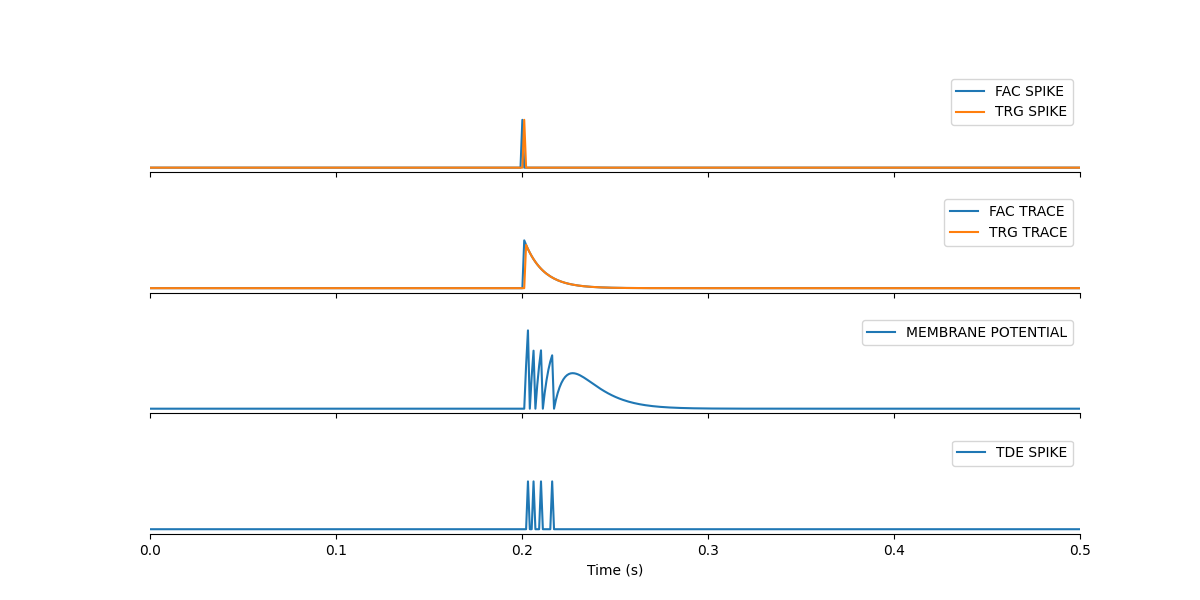

### Import real world data


Real-world data represents the actual observations or measurements collected from the target application or environment where the model will be deployed. Real-world data possesses the following characteristics:

- *Complexity and Variability*: Real-world data often contains noise, missing values, outliers, and unexpected patterns. It reflects the inherent complexity and diversity of the application domain, providing a more realistic assessment of the model's performance.

- *Generalizability*: Testing a model on real-world data is crucial to assess its generalizability and ability to handle unseen examples. Real-world data exposes the model to the diverse conditions and scenarios that it will encounter in practical use.

- *Performance Evaluation*: Evaluating a model on real-world data helps identify potential issues, limitations, and areas for improvement. It provides insights into how the model performs when facing the challenges and uncertainties of the target application.


In [18]:
recording = 'mario_dvs_long.aedat4'

aer_format = tonic.io.read_aedat_header_from_file(recording)
rec = tonic.io.read_aedat4((recording))

cropped_width = 170 #Sensor's is 346
cropped_hight = 130 # Sensor's is 260
cropped_size = (cropped_width,cropped_hight) #CAN BE REDUCED TO LOWER COMPUTATIONAL OVERHEAD OF SIM

t_window = 20000 #This can be increased to further reduce computation (at cost of accuracy of course)

In [19]:
events = []

names = ['t', 'x', 'y', 'p']
formats = ['<i8','<i8','<i8','<i8']

dtype = np.dtype({'names': names, 'formats': formats})

start = rec[0][0]
end = rec[-1][0]

for i, v in enumerate(rec):
    
    if v[3] == True:
        pol = 1
    if v[3] == False:
        pol = 0

    events.append(np.asarray((v[0]-start, v[1],v[2], pol), dtype = dtype))

transform = tonic.transforms.Compose(
    [
        tonic.transforms.CenterCrop(sensor_size=(346, 260, 2), size=cropped_size),
        tonic.transforms.ToFrame(
            time_window=t_window,
            sensor_size=(*cropped_size, 2),
        ),
    ]
)

frames = transform(np.array(events))

total_time = (end - start)/1e6

time_step = total_time/len(frames)

print(f"total frames: {len(frames)} ")
print(f"total time: {total_time} ")

total frames: 1498 
total time: 29.995905 


### Animate frames

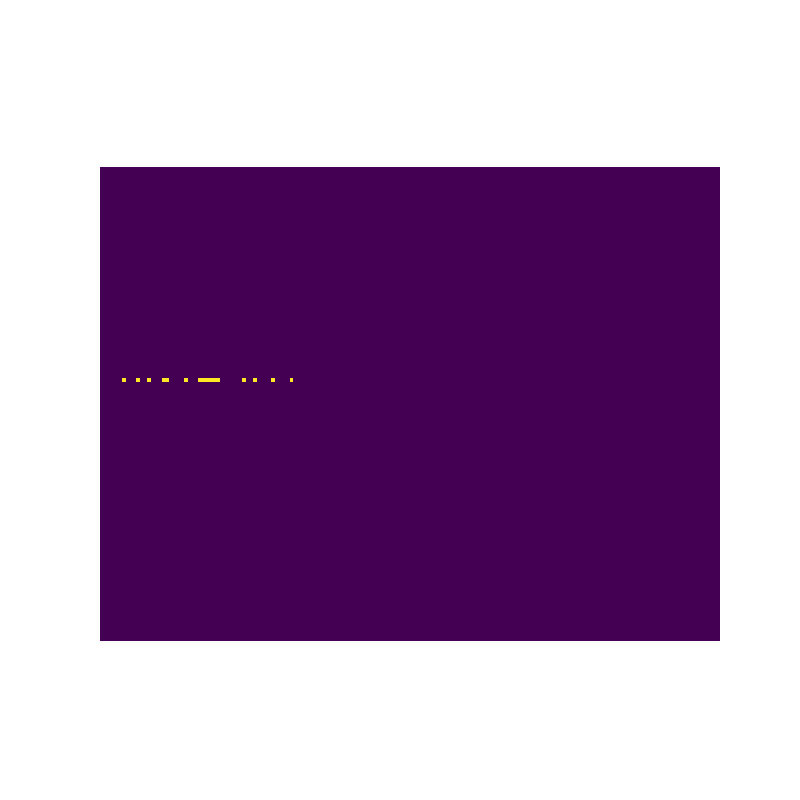

In [21]:
fig = plt.figure(figsize=(8, 8), dpi=100)
if frames[0].shape[0] == 2:
    first_frame = frames[0][1] - frames[0][0]
else:
    first_frame = frames[0][0]
ax = plt.imshow(first_frame)
plt.axis("off")

def animate(frame):
    if frame.shape[0] == 2:
        frame = frame[1] - frame[0]
    else:
        frame = frame[0]
    ax.set_data(frame)
    return ax

# Writer = animation.FFMpegWriter(fps=30, codec='libx264')  #or 
# Writer = animation.FFMpegWriter(fps=20, metadata=dict(artist='Me'), bitrate=1800) 
anim = animation.FuncAnimation(fig, animate, frames=frames, interval=time_step*1000)

plt.show()
plt.close()

### Create FAC/TRG Event input tensors

In [22]:
stride = 2 #Pixel distance between FAC and TRG connections

fac_input = frames[:,0,:,:-stride].reshape(frames[:,0,:,:-stride].shape[0], -1)
trg_input = frames[:,0,:,stride:].reshape(frames[:,0,:,stride:].shape[0], -1)
print(frames.shape)
print(fac_input.shape)

(1498, 2, 130, 170)
(1498, 21840)


### Run simulation for two populations (parameters can be played with) 

In [23]:
_, spk_recLR, _, _ = tde(tau_fac=0.02, tau_trg=0.05 , tau_mem=0.1, 
                                            time_step=total_time/(fac_input.shape[0]), n_time_steps=fac_input.shape[0], fac_in=fac_input, trg_in=trg_input)

_, spk_recRL, _, _ = tde(tau_fac=0.02, tau_trg=0.05, tau_mem=0.1, 
                                            time_step=total_time/(fac_input.shape[0]), n_time_steps=fac_input.shape[0], fac_in=trg_input, trg_in=fac_input)

### Make frames out network output

In [24]:
frames_tdeLR = spk_recLR.T.reshape(frames[:,0,:,stride:].shape)
frames_tdeRL = spk_recRL.T.reshape(frames[:,0,:,stride:].shape)

### Animate two populations

In [29]:
### Getting ready to plot and anymate

def animate(frame):
    ax[0].clear()
    ax[0].imshow(frame[0], cmap='viridis', alpha = 1)
    ax[0].set_title('L $\\rightarrow$ R TDE Layer')
    ax[0].set_axis_off()
    ax[1].clear()
    ax[1].imshow(frame[1], cmap='viridis', alpha = 1)
    ax[1].set_title('R $\\rightarrow$ L TDE Layer')
    ax[1].set_axis_off()


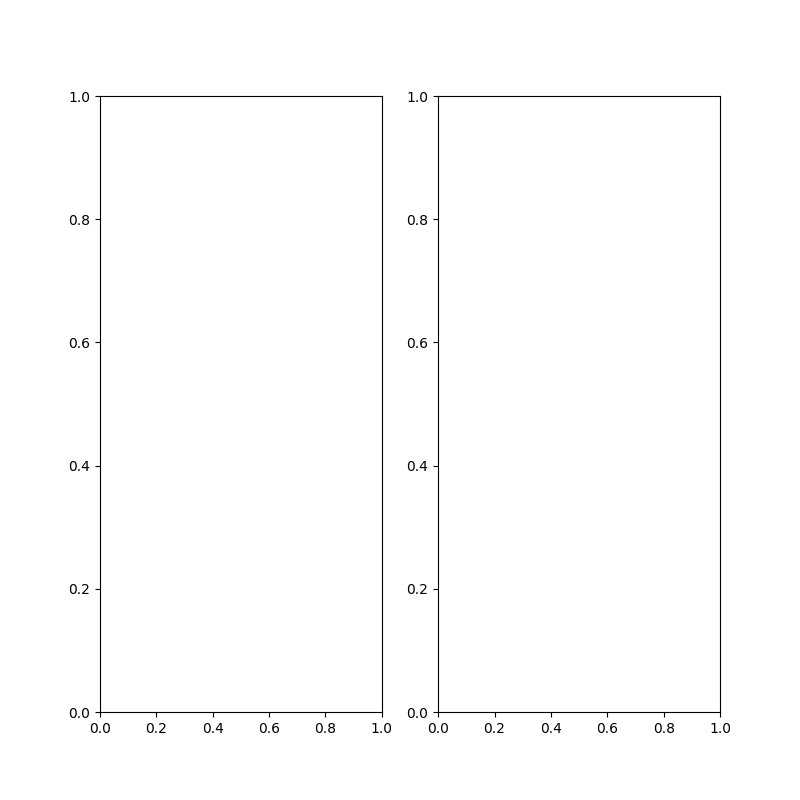

ERROR:tornado.application:Exception in callback <bound method TimerBase._on_timer of <matplotlib.backends.backend_webagg_core.TimerTornado object at 0x7fb1e4c2c760>>
Traceback (most recent call last):
  File "/home/ejanotte/.local/lib/python3.8/site-packages/tornado/ioloop.py", line 919, in _run
    val = self.callback()
  File "/home/ejanotte/.local/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 1226, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/ejanotte/.local/lib/python3.8/site-packages/matplotlib/animation.py", line 1426, in _step
    still_going = super()._step(*args)
  File "/home/ejanotte/.local/lib/python3.8/site-packages/matplotlib/animation.py", line 1119, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/ejanotte/.local/lib/python3.8/site-packages/matplotlib/animation.py", line 1138, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/ejanotte/.local/lib/python3.8/site-packages/matplotlib/animation.py", line 1

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(8, 8), dpi=100)

anim = animation.FuncAnimation(fig, animate, frames=np.array(list(zip(frames_tdeLR,frames_tdeRL))), interval=total_time/(fac_input.shape[0]-1)*1000)

plt.show()
plt.close()

### Plot pixelwise activity difference between population activity, top left value is differential frame spike count

### black = left motion
### white = right motion 

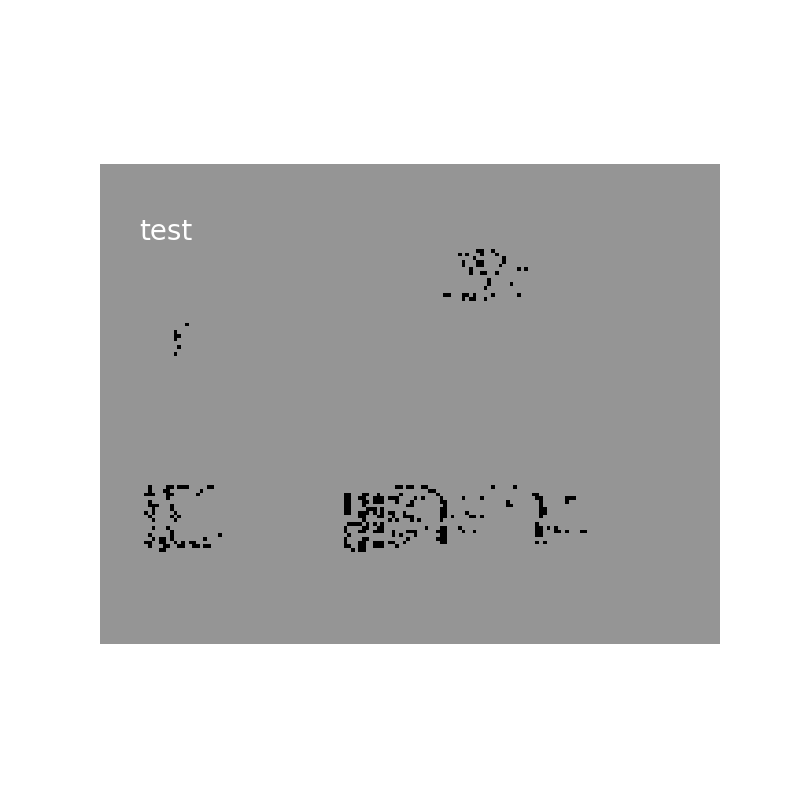

In [34]:
slowmo = 2 #slow down video by factor

fig = plt.figure(figsize=(8, 8), dpi=100)
first_frame = frames_tdeLR[100]
ax = plt.imshow(first_frame, vmin = -1, vmax = 1, cmap='Greys')
text = plt.text(10, 20, 'test', color='white', size=20)
plt.axis("off")

def animate(frame):
    a = frame[1] - frame[0]
    ax.set_data(a)
    text.set_text(str(np.sum(frame[1])-np.sum(frame[0])))
    return ax

anim = animation.FuncAnimation(fig, animate, frames=np.array(list(zip(frames_tdeLR,frames_tdeRL))), interval=total_time/(fac_input.shape[0]-1)*1000*(slowmo))
plt.show()
plt.close()


### Plot activity of populations overtime

In [43]:
plt.figure()
plt.plot(np.sum(frames_tdeLR.reshape(frames_tdeLR.shape[0], -1), axis = 1), label= 'OF L2R')
plt.plot(np.sum(frames_tdeRL.reshape(frames_tdeRL.shape[0], -1), axis = 1), label= 'OF R2L')

ERROR:tornado.application:Exception in callback <bound method TimerBase._on_timer of <matplotlib.backends.backend_webagg_core.TimerTornado object at 0x7fb1e4537eb0>>
Traceback (most recent call last):
  File "/home/ejanotte/.local/lib/python3.8/site-packages/tornado/ioloop.py", line 919, in _run
    val = self.callback()
  File "/home/ejanotte/.local/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 1226, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/ejanotte/.local/lib/python3.8/site-packages/matplotlib/animation.py", line 1430, in _step
    self._init_draw()
  File "/home/ejanotte/.local/lib/python3.8/site-packages/matplotlib/animation.py", line 1748, in _init_draw
    self._draw_frame(frame_data)
  File "/home/ejanotte/.local/lib/python3.8/site-packages/matplotlib/animation.py", line 1767, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_73333/3897164988.py", line 4, in animate
    ax[0].clear()
TypeError: '

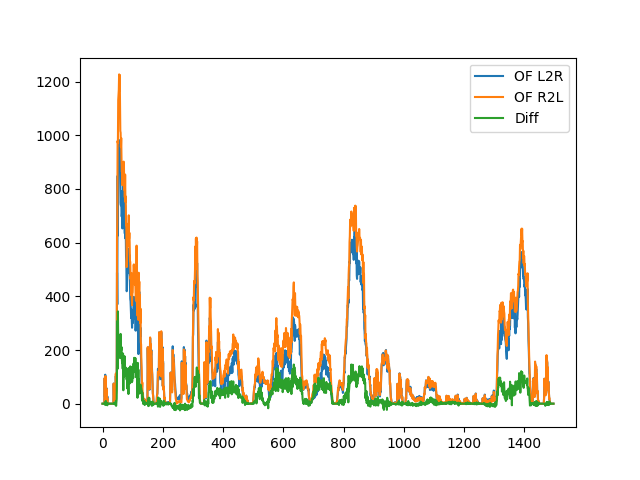

In [44]:
diff = np.sum(-frames_tdeLR.reshape(frames_tdeLR.shape[0], -1), axis = 1) + np.sum(frames_tdeRL.reshape(frames_tdeRL.shape[0], -1), axis = 1)
plt.plot(diff, label = 'Diff')
plt.legend()
plt.show()